In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import FortranFile
from numpy.fft import fft2,ifft2,fftfreq,fftshift
from matplotlib.colors import LogNorm
from scipy.stats import linregress as lin
from mpl_toolkits.axes_grid1 import make_axes_locatable

% matplotlib inline

### Thesis Equation

$\partial_tn(x,y,t) = -wn + an^2-bn^3+\delta ||\nabla n ||^2 + \alpha(\nabla^2n)n + \beta(\nabla^4n)n+\epsilon\nabla^2n$

In [2]:
##Parameters
#a, b = 4.4, 10.0; 
#delta, alfa, beta, eps = 2.31009579609, -400.0, -16000.0, 0.816619071091;
#mu = 1/np.sqrt(b); chi = (1./(mu*abs(beta)))**(1./4);

##NonDim Parameters
a, b = 1.39140217047, 1.0;  
delta, alfa, beta, eps = 0.0102699894735, -1.77827941004, -1.0, 0.0114804662653;

####  Solution $n_A = 0$

Na=0
w=-0.1, qc=0
sigma(qc)=0.1
Unstable


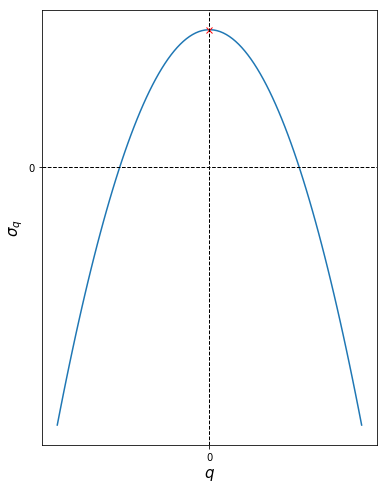

In [3]:
##Homogeneous solution Na = 0. 
##Mortality: w goes from -inf to inf. The solution is stable for w larger than zero.
w = - 0.1;  

##Modes: sigma(q) smaller than zero indicates that the mode q of the perturbation grows. Instability.
##The first mode to start growing is qc = 0.
q = np.linspace(-5,5,100);
sigma = - ( w  + eps*q**2 );

##Figure
plt.figure(1,facecolor='w', figsize = (6,8))
plt.plot(q,sigma);
plt.plot(0,-w,'rx');
plt.axvline(x=0.0,color='k',linestyle='--',linewidth=1)
plt.axhline(y=0.0,color='k',linestyle='--',linewidth=1)
plt.xlabel('$q$',fontsize=15); plt.ylabel('$\sigma_q$',fontsize=15)
plt.xticks(np.arange(0,1, step=1)); plt.yticks(np.arange(0,1, step=1))

##Outputs
print 'Na=' + str(0) 
print 'w=' + str(w) + ', qc=' + str(0)
print 'sigma(qc)=' + str(-w)
if -w > 0: print 'Unstable'
else: print 'Stable'

### Figure

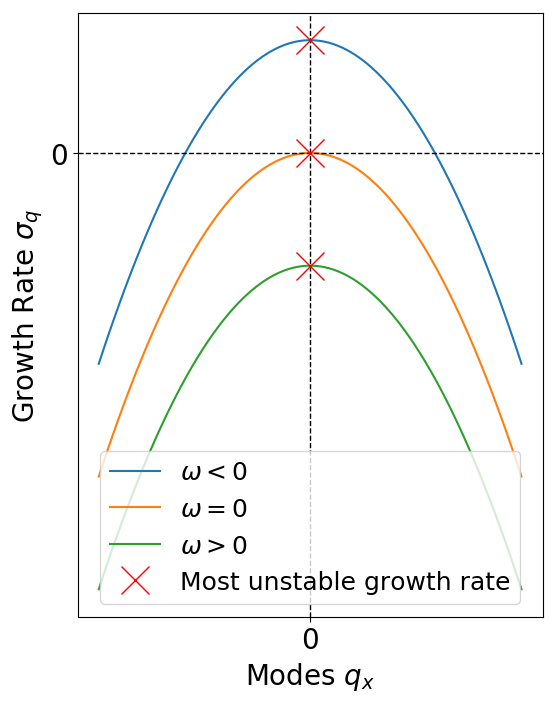

In [4]:
###Fig1
q = np.linspace(-5,5,100);
wvec = [-0.1,0.1,0]; 
sigma1 = - ( wvec[0]  + eps*q**2 );
sigma2 = - ( wvec[1]  + eps*q**2 );
sigma3 = - ( wvec[2]  + eps*q**2 );

plt.figure(1,facecolor='w', figsize = (6,8),dpi=100);
plt.plot(q,sigma1,label='$\omega < 0$');
plt.plot(q,sigma3,label='$\omega = 0$');
plt.plot(q,sigma2,label='$\omega > 0$');
plt.axvline(x=0.0,color='k',linestyle='--',linewidth=1);
plt.axhline(y=0.0,color='k',linestyle='--',linewidth=1);
plt.plot(0,-wvec[0],'rx',markersize=20); plt.plot(0,-wvec[1],'rx',markersize=20); plt.plot(0,-wvec[2],'rx',markersize=20,label='Most unstable growth rate'); 
plt.xlabel('Modes $q_x$',fontsize=20); plt.ylabel('Growth Rate $\sigma_q$',fontsize=20);
plt.xticks([0],('0'),fontsize = 20); plt.yticks([0],('0'),fontsize = 20);

plt.legend(loc = 'lower center', fontsize = 18);

####  Solution $n_B^{-} = \frac{a - \sqrt{a^2-4bw}}{2b}$

Nb-=0.162784581459
w=0.2, w*=0.00894113061275
qc=0.92405462396
sigma(qc)=0.292188369438
Unstable


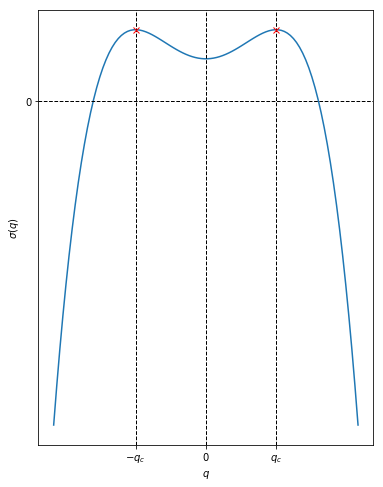

In [5]:
##Homogeneous solution Nb-. 

##Mortality: w goes from 0 to a**2/(4*b) since we are looking for positive values of the field.
w = 0.2; q = np.linspace(-2,2,100);

if w < 0 or w > (a**2/(4*b)):
    print 'Please pick w between ' + str(0) + ' and ' + str(a**2/(4*b))
else:
    
    ##Solution
    Ub = ( a - np.sqrt(a**2-4*b*w) ) / (2*b);
    
    ##Modes: sigma(q) larger than zero indicates that the mode q of the perturbation grows. Instability.
    ##The mode q=0 is always positive, solution is always unstable 
    sigma = -w +2*a*Ub -3*b*Ub**2 -(alfa*Ub+eps)*q**2 +beta*Ub*q**4;

    ##For w = w* there is a change in the behavior of sigma. Change in the critical modes. Two critical when larger.
    wc = (a**2 - ((2*b*eps)/alfa + a)**2) / (4*b);
    if w >= wc:
        qc = np.sqrt((2*(alfa*Ub+eps))/(4*beta*Ub));
        sigmac = -w +2*a*Ub -3*b*Ub**2 -(alfa*Ub+eps)*qc**2 +beta*Ub*qc**4
    else: qc = 0; sigmac = -w +2*a*Ub -3*b*Ub**2;
        
    ##Figure
    plt.figure(1,facecolor='w', figsize = (6,8))
    plt.plot(q,sigma);
    plt.axhline(y=0.0,color='k',linestyle='--',linewidth=1)
    plt.yticks([0],('0'))
    plt.xlabel('$q$'); plt.ylabel('$\sigma(q)$')
    plt.axvline(x=0,color='k',linestyle='--',linewidth=1)
    if w > wc:
        plt.axvline(x=qc,color='k',linestyle='--',linewidth=1)
        plt.axvline(x=-qc,color='k',linestyle='--',linewidth=1)
        plt.plot(qc,sigmac,'rx'); plt.plot(-qc,sigmac,'rx');
        plt.xticks([-qc,0,qc],('$-q_{c}$','0','$q_{c}$'));
    else:
        plt.axvline(x=0.0,color='k',linestyle='--',linewidth=1)
        plt.plot(qc,sigmac,'rx');
        plt.xticks([0],('0'));
    
    ##Outputs
    print 'Nb-=' + str(Ub)
    print 'w=' + str(w) + ', w*=' + str(wc)
    print 'qc=' + str(qc)
    if w >= wc:
        print 'sigma(qc)=' + str(sigmac);
    else:
        print 'sigma(qc)=' + str(sigmac);
    if sigmac > 0: print 'Unstable'
    else: print 'Stable'

### Figure

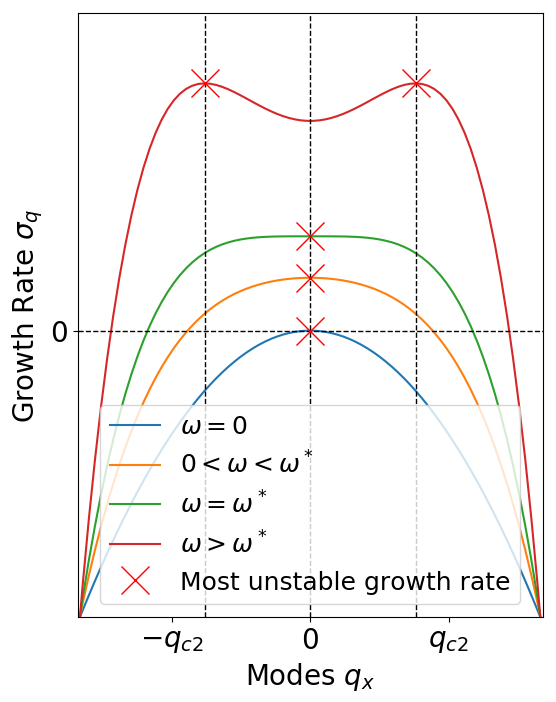

In [6]:
##Fig2
q = np.linspace(-2,2,100);
wc = (a**2 - ((2*b*eps)/alfa + a)**2) / (4*b);
wvec = [0,0.005,wc,0.02];

w = wvec[0];
Ub = ( a - np.sqrt(a**2-4*b*w) ) / (2*b);
sigma0 = -w +2*a*Ub -3*b*Ub**2 -(alfa*Ub+eps)*q**2 +beta*Ub*q**4;

w = wvec[1];
Ub = ( a - np.sqrt(a**2-4*b*w) ) / (2*b);
sigma1 = -w +2*a*Ub -3*b*Ub**2 -(alfa*Ub+eps)*q**2 +beta*Ub*q**4;
qc1 = 0; sigmac1 = -w +2*a*Ub -3*b*Ub**2;

w = wvec[2]
Ub = ( a - np.sqrt(a**2-4*b*w) ) / (2*b);
sigma2 = -w +2*a*Ub -3*b*Ub**2 -(alfa*Ub+eps)*q**2 +beta*Ub*q**4;
qc2 = np.sqrt((2*(alfa*Ub+eps))/(4*beta*Ub));
sigmac2 = -w +2*a*Ub -3*b*Ub**2 -(alfa*Ub+eps)*qc2**2 +beta*Ub*qc2**4

w = wvec[3]
Ub = ( a - np.sqrt(a**2-4*b*w) ) / (2*b);
sigma3 = -w +2*a*Ub -3*b*Ub**2 -(alfa*Ub+eps)*q**2 +beta*Ub*q**4;
qc3 = np.sqrt((2*(alfa*Ub+eps))/(4*beta*Ub));
sigmac3 = -w +2*a*Ub -3*b*Ub**2 -(alfa*Ub+eps)*qc3**2 +beta*Ub*qc3**4

plt.figure(1,facecolor='w', figsize = (6,8),dpi=100);
plt.plot(q,sigma0,label='$\omega = 0$');
plt.plot(q,sigma1,label='$0 < \omega < \omega^*$');
plt.plot(q,sigma2,label='$\omega = \omega^*$');
plt.plot(q,sigma3,label='$\omega > \omega^*$');
plt.axvline(x=0.0,color='k',linestyle='--',linewidth=1);
plt.axvline(x=qc3,color='k',linestyle='--',linewidth=1);
plt.axvline(x=-qc3,color='k',linestyle='--',linewidth=1);
plt.axhline(y=0.0,color='k',linestyle='--',linewidth=1);
plt.plot(0,0,'rx',markersize=20); plt.plot(qc1,sigmac1,'rx',markersize=20);
plt.plot(qc2,sigmac2,'rx',markersize=20,label='Most unstable growth rate'); 
plt.plot(qc3,sigmac3,'rx',markersize=20); plt.plot(-qc3,sigmac3,'rx',markersize=20);
plt.xlabel('Modes $q_x$',fontsize=20); plt.ylabel('Growth Rate $\sigma_q$',fontsize=20);
plt.yticks(np.arange(0,1, step=1),fontsize=20);
plt.xticks(np.arange(-qc,2*qc, step=qc),('$-q_{c2}$','0','$q_{c2}$'),fontsize=20);
plt.axis([-1.55, 1.55, -0.027, 0.03]);
plt.legend(loc = 'lower center', fontsize=18);

####  Solution $N_B^{+} = \frac{a + \sqrt{a^2-4bw}}{2b}$

Ub+=0.967730495404
w=0.41, Wc=0.331431423366
qc=0.939791498505, Qc=0.94013589736
sigma(qc)=0.228382130568
Unstable


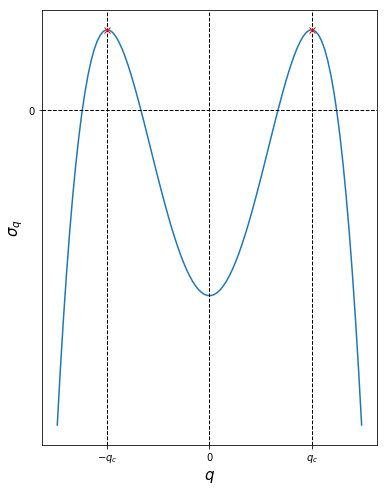

In [7]:
##Homogeneous solution Nb+. 

##Mortality: w goes from -inf to a**2/(4*b) since we are looking for positive values of the field.
w = 0.41; q = np.linspace(-1.4,1.4,100); 

if w > (a**2/(4*b)):
    print 'Please pick w between minus infinite and ' + str(a**2/(4*b))
else:
    
    ##Solution
    Ub = ( a + np.sqrt(a**2-4*b*w) ) / (2*b);

    ##Modes: sigma(q) larger than zero indicates that the mode q of the perturbation grows. Instability.
    sigma = -w +2*a*Ub -3*b*Ub**2 -(alfa*Ub+eps)*q**2 +beta*Ub*q**4;

    ##For w = w* there is a change in the behavior of sigma, but this value is always larger than a**2/(4*b). 
    ## Change in the critical modes. In this case we always are in the regime of two critical qc.
    wc = (a**2 + ((2*b*eps)/alfa + a)**2) / (4*b);
    qc = np.sqrt((2*(alfa*Ub+eps))/(4*beta*Ub));
    sigmac = -w +2*a*Ub -3*b*Ub**2 -(alfa*Ub+eps)*qc**2 +beta*Ub*qc**4;
    
    ##There is also a critical value where the solution becomes unstable. Where sigma(qc) is equal to zero.
    ##A Newton is needed to find it.
    def Fun(w):
        ss = np.sqrt(a**2-4*b*w);
        F = 16*beta*w*b - 4*a*beta*ss - (a*b*eps**2)/w + b*(eps**2/w - alfa**2/b)*ss - (4*a**2*beta + a*alfa**2 + 4*b*alfa*eps)
        return F
    
    #Newton
    wo = 0.4; ##Initial Condition
    tolmax, itmax = 1E-6, 30;
    tol = 1000; it = 0; h = 1E-4;
    while tol > tolmax or it < itmax:
        dF = (Fun(wo+h)-Fun(wo-h))/(2*h);
        wn = wo - (Fun(wo)) / dF;
        it += 1; tol = abs(wn-wo);
        wo = wn;
    Wc = wo; UbC = ( a + np.sqrt(a**2-4*b*Wc) ) / (2*b);
    Qc = np.sqrt((2*(alfa*UbC+eps))/(4*beta*UbC));
    
    ##Figure
    plt.figure(1,facecolor='w', figsize = (6,8))
    plt.plot(q,sigma);
    plt.axvline(x=0.0,color='k',linestyle='--',linewidth=1)
    plt.axhline(y=0.0,color='k',linestyle='--',linewidth=1)
    plt.axvline(x=qc,color='k',linestyle='--',linewidth=1)
    plt.axvline(x=-qc,color='k',linestyle='--',linewidth=1)
    plt.xlabel('$q$',fontsize=15); plt.ylabel('$\sigma_q$',fontsize=15)
    plt.plot(qc,sigmac,'rx'); plt.plot(-qc,sigmac,'rx')
    plt.yticks([0],('0'))
    plt.xticks([-qc, 0, qc],('$-q_{c}$','0','$q_{c}$'));
    
    ##Outputs
    print 'Ub+=' + str(Ub)
    print 'w=' + str(w) + ', Wc=' + str(Wc) 
    print 'qc=' + str(qc) + ', Qc=' + str(Qc)
    print 'sigma(qc)=' + str(sigmac);
    if sigmac > 0: print 'Unstable'
    else: print 'Stable'

### Figure

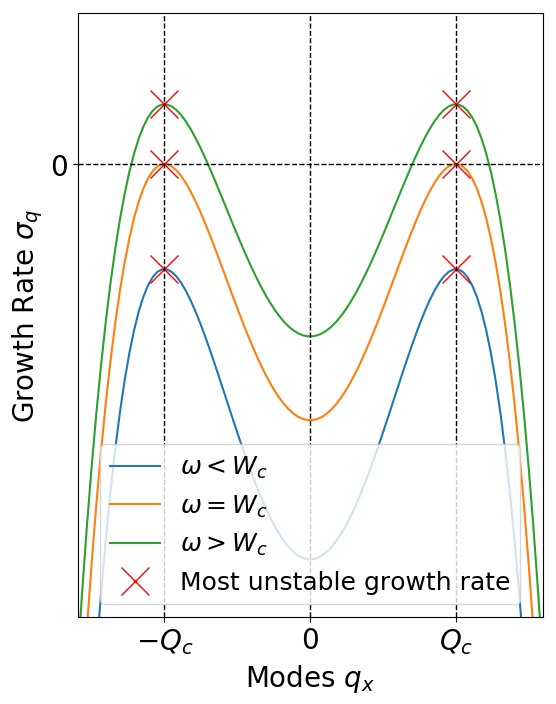

In [8]:
##Fig3
q = np.linspace(-1.5,1.5,100);
wvec = [0.20, 0.3314, 0.40];

w = wvec[0];
Ub = ( a + np.sqrt(a**2-4*b*w) ) / (2*b);
sigma0 = -w +2*a*Ub -3*b*Ub**2 -(alfa*Ub+eps)*q**2 +beta*Ub*q**4;
qc0 = np.sqrt((2*(alfa*Ub+eps))/(4*beta*Ub));
sigmac0 = -w +2*a*Ub -3*b*Ub**2 -(alfa*Ub+eps)*qc0**2 +beta*Ub*qc0**4

w = wvec[1];
Ub = ( a + np.sqrt(a**2-4*b*w) ) / (2*b);
sigma1 = -w +2*a*Ub -3*b*Ub**2 -(alfa*Ub+eps)*q**2 +beta*Ub*q**4;
qc2 = np.sqrt((2*(alfa*Ub+eps))/(4*beta*Ub));
sigmac2 = -w +2*a*Ub -3*b*Ub**2 -(alfa*Ub+eps)*qc2**2 +beta*Ub*qc2**4

w = wvec[2];
Ub = ( a + np.sqrt(a**2-4*b*w) ) / (2*b);
sigma2 = -w +2*a*Ub -3*b*Ub**2 -(alfa*Ub+eps)*q**2 +beta*Ub*q**4;
qc3 = np.sqrt((2*(alfa*Ub+eps))/(4*beta*Ub));
sigmac3 = -w +2*a*Ub -3*b*Ub**2 -(alfa*Ub+eps)*qc3**2 +beta*Ub*qc3**4

plt.figure(1,facecolor='w', figsize = (6,8),dpi=100);
plt.plot(q,sigma0,label='$\omega < W_c$');
plt.plot(q,sigma1,label='$\omega = W_c$');
plt.plot(q,sigma2,label='$\omega > W_c$');

plt.axvline(x=0.0,color='k',linestyle='--',linewidth=1);
plt.axhline(y=0.0,color='k',linestyle='--',linewidth=1);
plt.plot(qc0,sigmac0,'rx',markersize=20); plt.plot(-qc0,sigmac0,'rx',markersize=20); 
plt.plot(qc2,sigmac2,'rx',markersize=20,label='Most unstable growth rate'); plt.plot(-qc2,sigmac2,'rx',markersize=20);
plt.plot(qc3,sigmac3,'rx',markersize=20); plt.plot(-qc3,sigmac3,'rx',markersize=20);
plt.xlabel('Modes $q_x$',fontsize=20); plt.ylabel('Growth Rate $\sigma_q$',fontsize=20);
plt.yticks(np.arange(0,1, step=1),fontsize=20);
plt.xticks(np.arange(-qc2,2*qc, step=qc),('$-Q_{c}$','0','$Q_{c}$'),fontsize=20);
plt.axis([-1.5, 1.5, -1.5, 0.5]);
plt.axvline(x=qc2,color='k',linestyle='--',linewidth=1);
plt.axvline(x=-qc2,color='k',linestyle='--',linewidth=1);
plt.legend(loc = 'lower center',fontsize=18);

### Bifurcation Diagram 

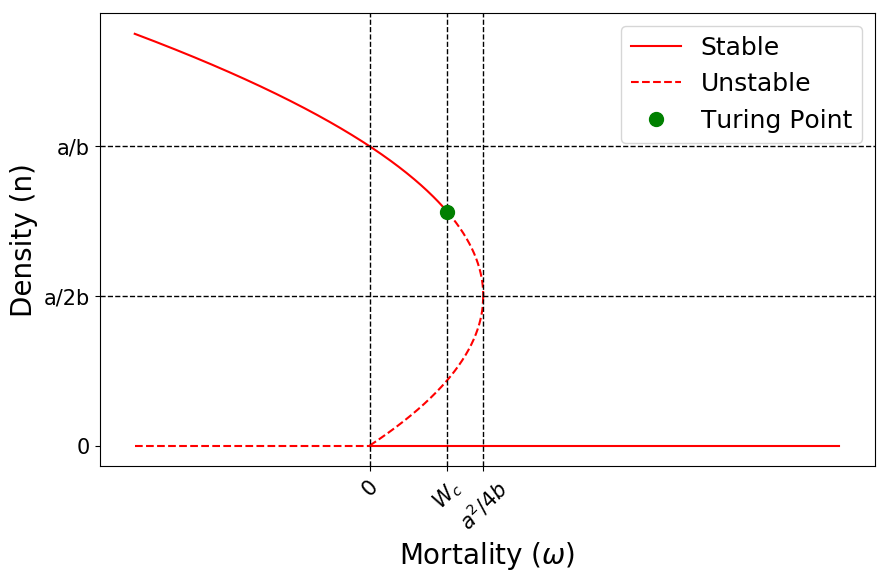

In [9]:
##We are interested in the range w = [-1,2] for the first set of Params.
##Figure of the perturbation linear analysis.
plt.figure(1,figsize=(10,6),dpi=100)
w1 = np.linspace(-1,0,100); w2 = np.linspace(0,2,100);
plt.plot(w1,np.zeros(len(w1)),'--r'); plt.plot(w2,np.zeros(len(w1)),'r',label='Stable');

w3 = np.linspace(0,a**2/(4*b),200);
Ubminus = (a - np.sqrt(a**2-4*w3*b)) / (2*b);
plt.plot(w3,Ubminus,'--r', label = 'Unstable');

w4 = np.linspace(-1,Wc,200); w5 = np.linspace(Wc,a**2/(4*b),200);
Ubplus1 = (a + np.sqrt(a**2-4*w4*b)) / (2*b); Ubplus2 = (a + np.sqrt(a**2-4*w5*b)) / (2*b);
plt.plot(w4,Ubplus1,'r'); plt.plot(w5,Ubplus2,'--r');

plt.axvline(x=0.0,color='k',linestyle='--',linewidth=1);
plt.axvline(x=Wc,color='k',linestyle='--',linewidth=1);
plt.axvline(x=a**2/(4*b),color='k',linestyle='--',linewidth=1);
plt.axhline(y=a/(2*b),color='k',linestyle='--',linewidth=1);
plt.axhline(y=a/b,color='k',linestyle='--',linewidth=1);

plt.plot(Wc,Ubplus1[-1],'go', markersize = 10, label='Turing Point')

plt.yticks([0,a/(2*b),a/b],('0','a/2b','a/b'),fontsize=15);
plt.xticks([0, Wc, a**2/(4*b)], ('0', '$W_c$', '$a^2/4b$'),fontsize=15,rotation=45);

plt.xlabel('Mortality ($\omega$)',fontsize=20); plt.ylabel('Density (n)',fontsize=20);
plt.legend(fontsize=18);

### Binary reader

In [5]:
##Binary reading
def fieldimport(in_name,n,m):
    f = FortranFile(in_name,'r')
    for ii in xrange(1):
        data = f.read_reals('f8')
        denst = np.array([[data[i+n*j] for i in range(n)] for j in range(m)])
    return denst

### Image Evolution

In [6]:
##Binary reading
def fieldimport_image(in_name,n,m,kk):
    f = FortranFile(in_name,'r')
    for ii in xrange(kk):
        data = f.read_reals('f8')
    denst = np.array([[data[i+n*j] for i in range(n)] for j in range(m)])
    return denst

### Initial Conditions

0.208852296142
0.241161858797


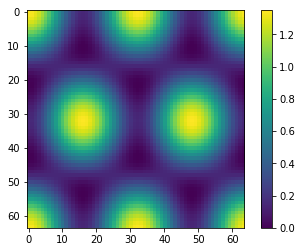

In [12]:
n = m = 64;
dx=2*np.pi/(n*Qc/2); #dx = dx/2;
dy=2*np.pi/(np.sqrt(3)*m*Qc/2); dy = dy*2

print dx
print dy

e = np.zeros((n,m))

##Rolls
#for k in xrange(m):
#    for j in xrange(n):
#        e[j,k] = 0.7*np.cos(Qc*j*dx) 
        
##PosHex
for k in xrange(m):
    for j in xrange(n):
        e[j,k] = 0.3*np.cos(Qc*j*dx) + 0.3*np.cos((0.5*Qc*j*dx + 0.5*np.sqrt(3.0)*Qc*k*dy)) + 0.3*np.cos((-0.5*Qc*j*dx + 0.5*np.sqrt(3.0)*Qc*k*dy)) 

##NegHex
#for k in xrange(m):
#    for j in xrange(n):
#        e[j,k] = - (0.3*np.cos(Qc*j*dx) + 0.3*np.cos((0.5*Qc*j*dx + 0.5*np.sqrt(3.0)*Qc*k*dy)) + 0.3*np.cos((-0.5*Qc*j*dx + 0.5*np.sqrt(3.0)*Qc*k*dy))) 

e = e + abs(np.min(e)) 
plt.imshow(e)
plt.colorbar()

### Image - Proves

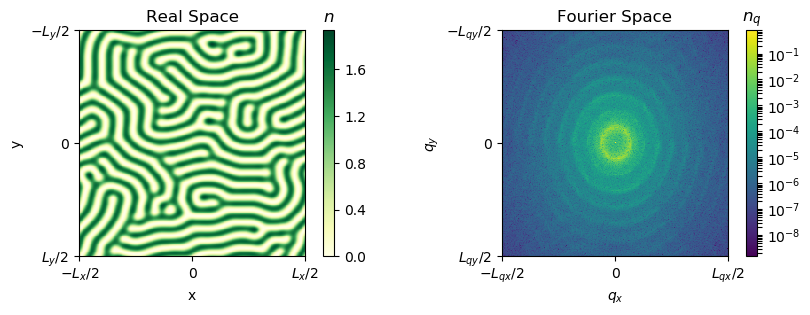

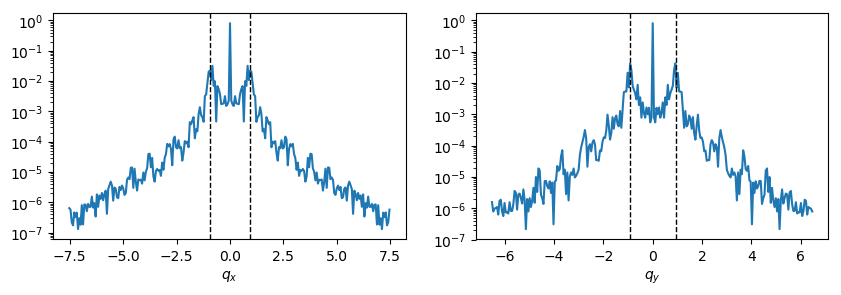

In [13]:
##Final Condition
n = 256; dx = 0.417704592284; 
m = 256; dy = 0.241161858797*2; 
file = 'Fig4/';

##Real
U = fieldimport_image(str(file) + 'cf35.dat',n,m,1);

##Phase Space
Uq = fft2(U); Uq = fftshift(Uq);
xs = np.linspace(-n/2,n/2,n); ys = np.linspace(-m/2,m/2,m); 
qx=fftshift(fftfreq(xs.shape[-1],dx))*2*np.pi;
qy=fftshift(fftfreq(ys.shape[-1],dy))*2*np.pi;

##Fig
plt.figure(1,figsize=(10,3),dpi=100)
plt.subplot(1,2,1);
plt.imshow(U,'YlGn'); cbr = plt.colorbar(); cbr.ax.set_title('$n$')
tick_locator = matplotlib.ticker.MaxNLocator(nbins=5); cbr.locator = tick_locator; cbr.update_ticks()
plt.xticks([0,n/2,n],['$-L_x/2$','0','$L_x/2$'])
plt.yticks([0,m/2,m],['$-L_y/2$','0','$L_y/2$'])
plt.title('Real Space'); plt.xlabel('x'); plt.ylabel('y');
plt.subplot(1,2,2);
plt.imshow(abs(Uq)/(m*n),norm=LogNorm(),interpolation = None);cbr = plt.colorbar(); cbr.ax.set_title('$n_q$')
plt.xticks([0,len(qx)/2,len(qx)],['$-L_{qx}/2$','0','$L_{qx}/2$'])
plt.yticks([0,len(qy)/2,len(qy)],['$-L_{qy}/2$','0','$L_{qy}/2$'])
plt.title('Fourier Space'); plt.xlabel('$q_x$'); plt.ylabel('$q_y$');

##Cut
plt.figure(2,figsize=(10,3),dpi=100);
plt.subplot(1,2,1);
plt.plot(qx,abs(Uq[m/2,:])/(m*n));
plt.xlabel('$q_x$'); plt.yscale('log');
plt.axvline(x=-Qc,color='k',linestyle='--',linewidth=1) 
plt.axvline(x=Qc,color='k',linestyle='--',linewidth=1)
#plt.xticks([0, -3, 3, -6, 6, -Qc, Qc], ('0', '-3', '3', '-6', '6', '$-Q_c$', '$Q_c$'))
plt.subplot(1,2,2);
plt.plot(qy,abs(Uq[:,n/2])/(m*n));
plt.xlabel('$q_y$'); plt.yscale('log');
plt.axvline(x=-Qc,color='k',linestyle='--',linewidth=1) 
plt.axvline(x=Qc,color='k',linestyle='--',linewidth=1)
#plt.xticks([0, -6, 6, -12, 12, -Qc, Qc], ('0', '-6', '6', '-12', '12', '$-Q_c$', '$Q_c$'))

plt.show()

### Numeric Homogeneous

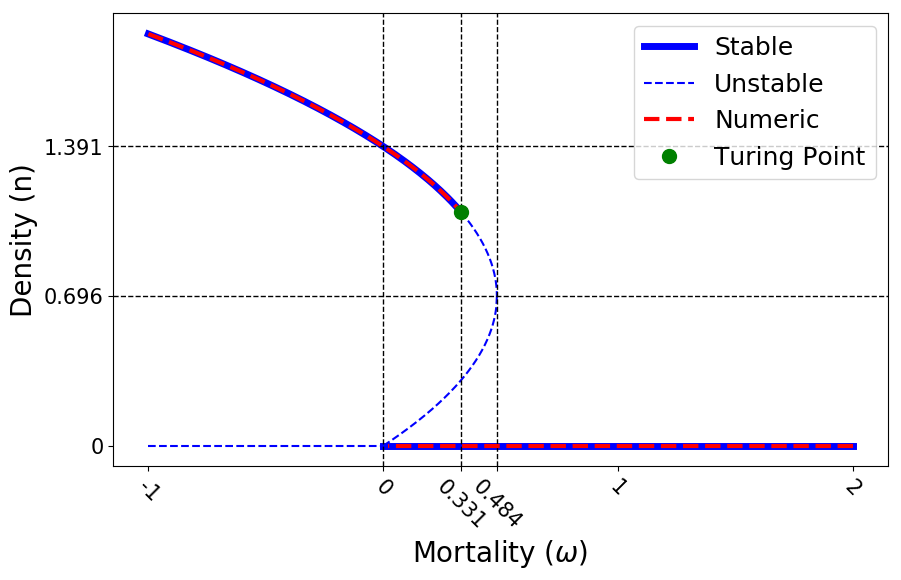

In [14]:
##We are interested in the range w = [-1,2] for the first set of Params.
##Figure of the perturbation linear analysis.

###ANALYTIC
plt.figure(1,figsize=(10,6),dpi=100)
w1 = np.linspace(-1,0,100); w2 = np.linspace(0,2,100);
plt.plot(w1,np.zeros(len(w1)),'--b'); plt.plot(w2,np.zeros(len(w1)),'b', linewidth =5,label='Stable');

w3 = np.linspace(0,a**2/(4*b),200);
Ubminus = (a - np.sqrt(a**2-4*w3*b)) / (2*b);
plt.plot(w3,Ubminus,'--b', label = 'Unstable');

w4 = np.linspace(-1,Wc,200); w5 = np.linspace(Wc,a**2/(4*b),200);
Ubplus1 = (a + np.sqrt(a**2-4*w4*b)) / (2*b); Ubplus2 = (a + np.sqrt(a**2-4*w5*b)) / (2*b);
plt.plot(w4,Ubplus1,'b',linewidth=5); plt.plot(w5,Ubplus2,'--b');

plt.axvline(x=0.0,color='k',linestyle='--',linewidth=1)
plt.axvline(x=Wc,color='k',linestyle='--',linewidth=1)
plt.axvline(x=a**2/(4*b),color='k',linestyle='--',linewidth=1)
plt.axhline(y=a/(2*b),color='k',linestyle='--',linewidth=1)
plt.axhline(y=a/b,color='k',linestyle='--',linewidth=1)

plt.yticks([0,a/(2*b),a/b],('0',round(a/2*b,3),round(a/b,3)),fontsize=15)
plt.xticks([-1,0, Wc, a**2/(4*b),1,2], ('-1','0', round(Wc,3), round(a**2/(4*b),3),'1','2'),rotation=-45,fontsize=15)

###################-----------------------##################

##NUMERIC HOMO BRANCH
file = 'Homo';
n = m = 128;
wvec = np.loadtxt(file + '/Branch2/wvec.dat', unpack = True); Uvec = np.zeros(len(wvec));

for ii in xrange(len(wvec)): 
    U = fieldimport(str(file) + '/Branch2/cf' + str(ii+1) + '.dat',m,n)
    Uvec[ii] = np.max(U)
plt.plot(wvec,Uvec,'--r',linewidth =3)

##NUMERIC HOMO ZERO
file = 'Homo';
n = m = 128;
wvec = np.loadtxt(file + '/Zero2/wvec.dat', unpack = True); Uvec = np.zeros(len(wvec));

for ii in xrange(len(wvec)): 
    U = fieldimport(str(file) + '/Zero2/cf' + str(ii+1) + '.dat',m,n)
    Uvec[ii] = np.max(U)
plt.plot(wvec,Uvec,'--r',linewidth =3, label = 'Numeric')

plt.plot(Wc,Ubplus1[-1],'go', markersize = 10, label='Turing Point')

plt.xlabel('Mortality ($\omega$)',fontsize=20); plt.ylabel('Density (n)',fontsize=20);
plt.legend(fontsize=18)

### Figure

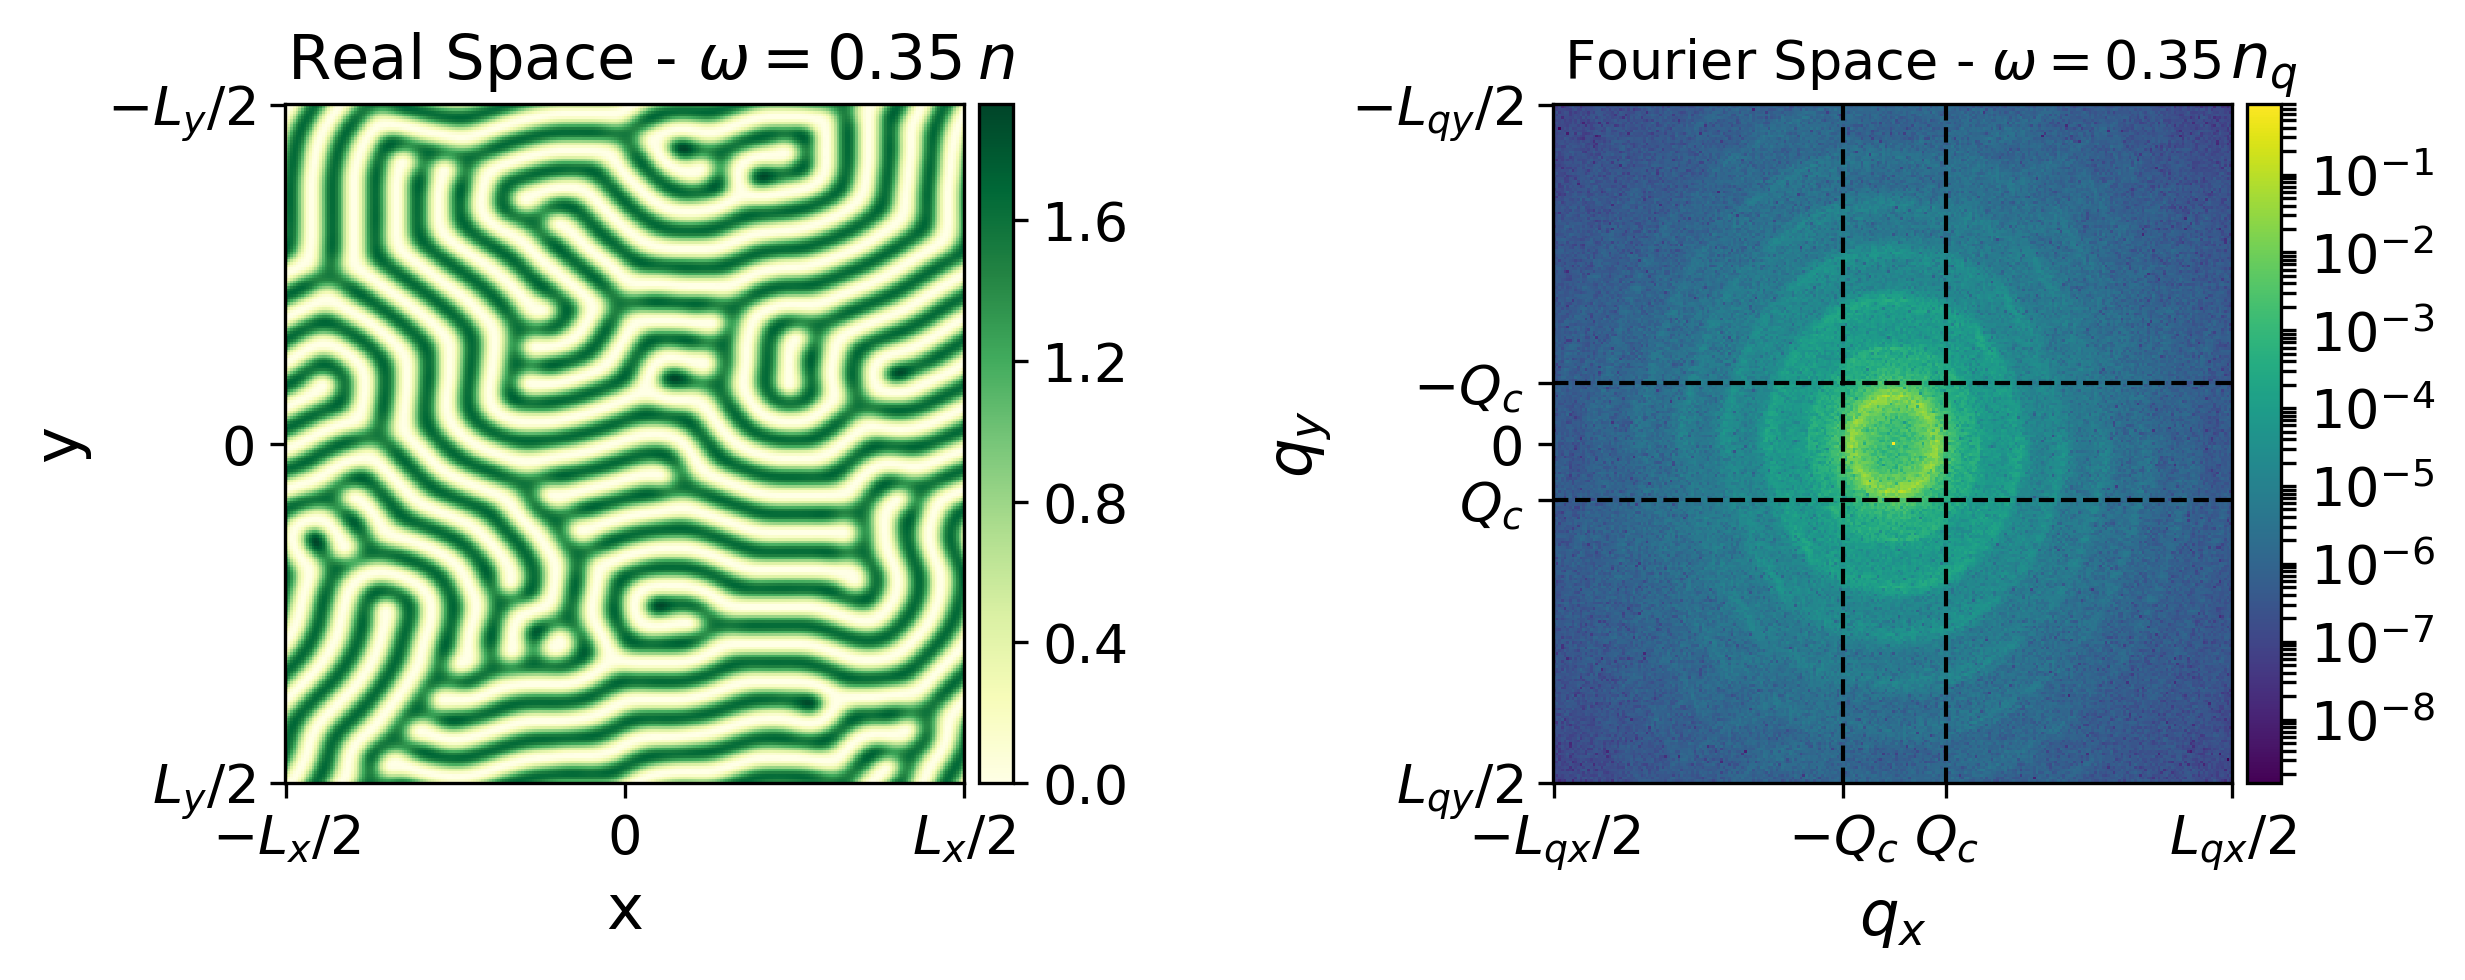

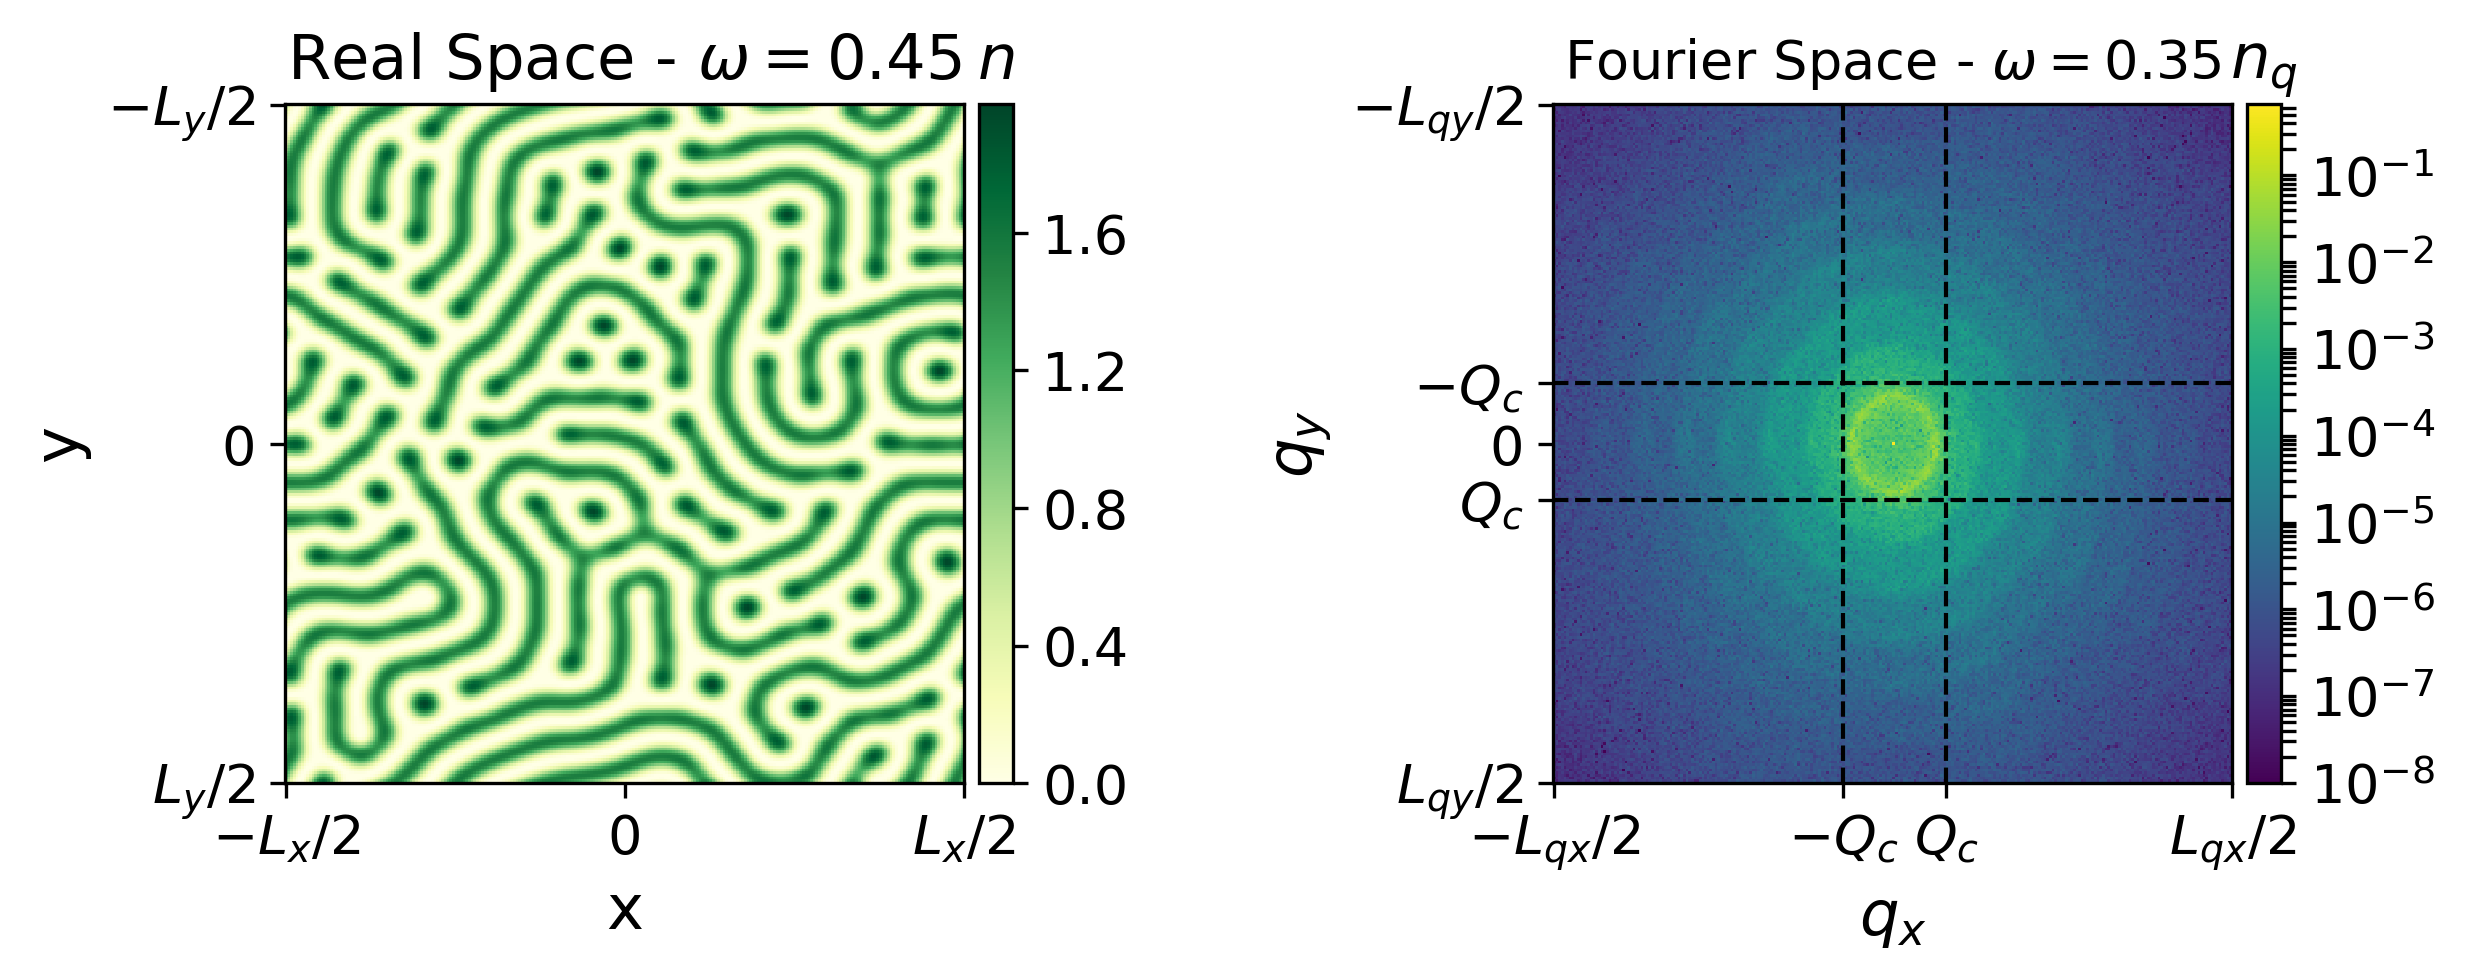

In [15]:
##Final Condition
n = 256; dx = 0.417704592284; 
m = 256; dy = 0.241161858797*2; 
file = 'Fig4/';

##Real
U = fieldimport(str(file) + 'cf35.dat',n,m);
U1 = fieldimport(str(file) + 'cf45.dat',n,m);


##Phase Space
Uq = fft2(U); Uq = fftshift(Uq);
xs = np.linspace(-n/2,n/2,n); ys = np.linspace(-m/2,m/2,m); 
qx=fftshift(fftfreq(xs.shape[-1],dx))*2*np.pi;
qy=fftshift(fftfreq(ys.shape[-1],dy))*2*np.pi;

Uq1 = fft2(U1); Uq1 = fftshift(Uq1);
xs = np.linspace(-n/2,n/2,n); ys = np.linspace(-m/2,m/2,m); 
qx1=fftshift(fftfreq(xs.shape[-1],dx))*2*np.pi;
qy1=fftshift(fftfreq(ys.shape[-1],dy))*2*np.pi

############Fig
plt.figure(3,figsize=(10,3),dpi=300)
plt.subplot(1,2,1);
plt.title('Real Space - $\omega = 0.35$',fontsize=15); plt.xlabel('x',fontsize=15); plt.ylabel('y',fontsize=15);
ax = plt.gca(); im = ax.imshow(U,'YlGn');
plt.xticks([0,n/2,n],['$-L_x/2$','0','$L_x/2$'],fontsize=13)
plt.yticks([0,m/2,m],['$-L_y/2$','0','$L_y/2$'],fontsize=13)
divider = make_axes_locatable(ax);
cax = divider.append_axes("right", size="5%", pad=0.05);
cbr = plt.colorbar(im, cax=cax); cbr.ax.set_title('$n$',fontsize=15);
tick_locator = matplotlib.ticker.MaxNLocator(nbins=5); cbr.locator = tick_locator; cbr.update_ticks(); 
cbr.ax.set_yticklabels(cbr.ax.get_yticklabels(), fontsize=13);
plt.subplot(1,2,2);
plt.title('Fourier Space - $\omega = 0.35$',fontsize=13); plt.xlabel('$q_x$',fontsize=15); plt.ylabel('$q_y$',fontsize=15);
ax = plt.gca(); im = ax.imshow(abs(Uq)/(n*m),norm=LogNorm());
plt.xticks([0,len(qx),109,m-108],['$-L_{qx}/2$','$L_{qx}/2$','$-Q_c$','$Q_c$'],rotation=0,fontsize=13)
plt.yticks([0,len(qy)/2,len(qy),105,m-107],['$-L_{qy}/2$','0','$L_{qy}/2$','$-Q_c$','$Q_c$'],fontsize=13)
plt.axhline(y=105,color='k',linestyle='--',linewidth=1)
plt.axhline(y=m-107,color='k',linestyle='--',linewidth=1)
plt.axvline(x=109,color='k',linestyle='--',linewidth=1)
plt.axvline(x=m-108,color='k',linestyle='--',linewidth=1)
divider = make_axes_locatable(ax);
cax = divider.append_axes("right", size="5%", pad=0.05);
cbr = plt.colorbar(im, cax=cax); cbr.ax.set_title('$n_q$',fontsize=15);
cbr.ax.set_yticklabels(cbr.ax.get_yticklabels(), fontsize=13);

plt.figure(4,figsize=(10,3),dpi=300)
plt.subplot(1,2,1);
plt.title('Real Space - $\omega = 0.45$',fontsize=15); plt.xlabel('x',fontsize=15); plt.ylabel('y',fontsize=15);
ax = plt.gca(); im = ax.imshow(U1,'YlGn');
plt.xticks([0,n/2,n],['$-L_x/2$','0','$L_x/2$'],fontsize=13)
plt.yticks([0,m/2,m],['$-L_y/2$','0','$L_y/2$'],fontsize=13)
divider = make_axes_locatable(ax);
cax = divider.append_axes("right", size="5%", pad=0.05);
cbr = plt.colorbar(im, cax=cax); cbr.ax.set_title('$n$',fontsize=15);
tick_locator = matplotlib.ticker.MaxNLocator(nbins=5); cbr.locator = tick_locator; cbr.update_ticks()
cbr.ax.set_yticklabels(cbr.ax.get_yticklabels(), fontsize=13);
plt.subplot(1,2,2);
plt.title('Fourier Space - $\omega = 0.35$',fontsize=13); plt.xlabel('$q_x$',fontsize=15); plt.ylabel('$q_y$',fontsize=15);
ax = plt.gca(); im = ax.imshow(abs(Uq1)/(n*m),norm=LogNorm());
plt.xticks([0,len(qx),109,m-108],['$-L_{qx}/2$','$L_{qx}/2$','$-Q_c$','$Q_c$'],fontsize=13)
plt.yticks([0,len(qy)/2,len(qy),105,m-107],['$-L_{qy}/2$','0','$L_{qy}/2$','$-Q_c$','$Q_c$'],fontsize=13)
plt.axhline(y=105,color='k',linestyle='--',linewidth=1)
plt.axhline(y=m-107,color='k',linestyle='--',linewidth=1)
plt.axvline(x=109,color='k',linestyle='--',linewidth=1)
plt.axvline(x=m-108,color='k',linestyle='--',linewidth=1)
divider = make_axes_locatable(ax);
cax = divider.append_axes("right", size="5%", pad=0.05);
cbr = plt.colorbar(im, cax=cax); cbr.ax.set_title('$n_q$',fontsize=15);
cbr.ax.set_yticklabels(cbr.ax.get_yticklabels(), fontsize=13);

### Negative Hexagons

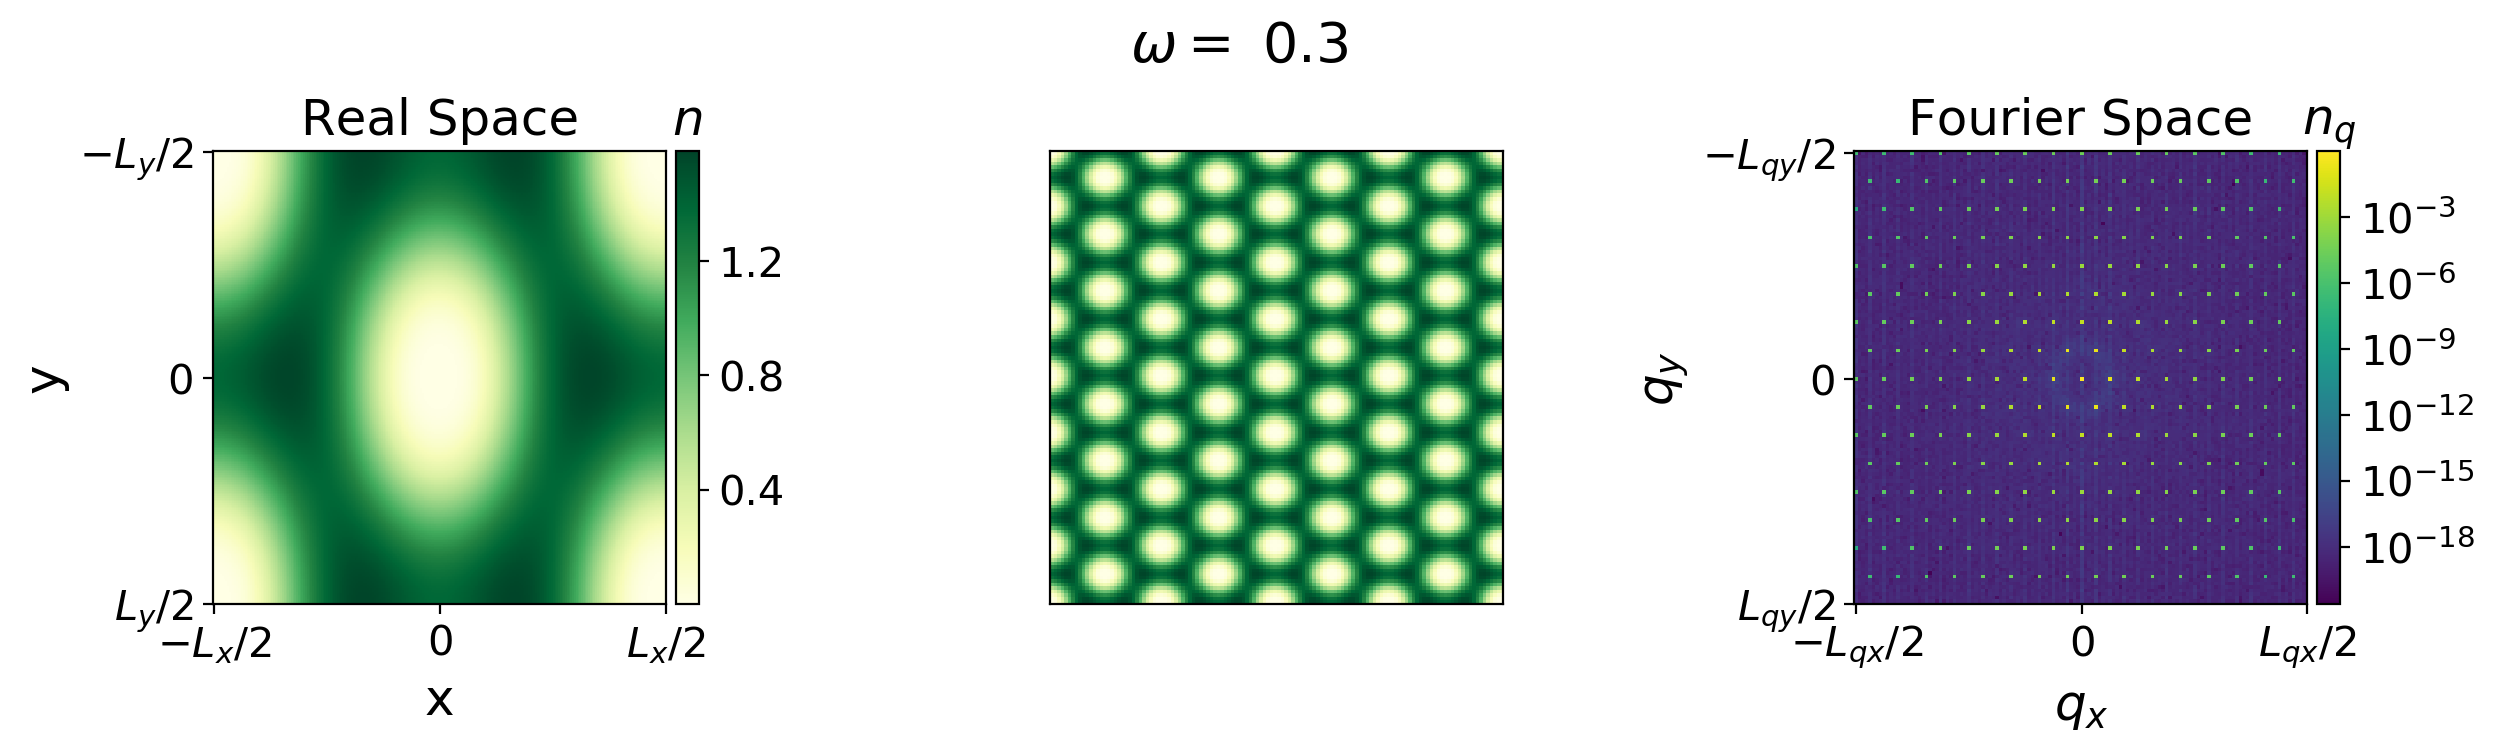

In [18]:
##Final Condition
n = 256; dx = 0.0522130740355; 
m = 256; dy = 0.0301452323496;
file = 'Negative_Hex/Unit_cell'
w = 0.3;

##Real
U = fieldimport(str(file) + '/cf.dat',n,m);

##Phase Space
Uq = fft2(U); Uq = fftshift(Uq); 
xs = np.linspace(-n/2,n/2,n); ys = np.linspace(-m/2,m/2,m); 
qx=fftshift(fftfreq(xs.shape[-1],dx))*2*np.pi;
qy=fftshift(fftfreq(ys.shape[-1],dy))*2*np.pi;

##Fig
plt.figure(4,figsize=(15,3),dpi=200)
plt.suptitle('$\omega = $ ' + str(w),y=1.1, fontsize = 20)
plt.subplot(1,3,1);
plt.title('Real Space',fontsize=18); plt.xlabel('x',fontsize=18); plt.ylabel('y',fontsize=18);
ax = plt.gca(); im = ax.imshow(U,'YlGn');
plt.xticks([0,n/2,n],['$-L_x/2$','0','$L_x/2$'],fontsize=15)
plt.yticks([0,m/2,m],['$-L_y/2$','0','$L_y/2$'],fontsize=15)
divider = make_axes_locatable(ax);
cax = divider.append_axes("right", size="5%", pad=0.05);
cbr = plt.colorbar(im, cax=cax); cbr.ax.set_title('$n$',fontsize=18);
tick_locator = matplotlib.ticker.MaxNLocator(nbins=5); cbr.locator = tick_locator; cbr.update_ticks()
cbr.ax.set_yticklabels(cbr.ax.get_yticklabels(), fontsize=15);

file = 'Negative_Hex/03+2';
n = 128; dx = 0.417704592284; 
m = 128; dy = 0.482323717594;

##Real
U = fieldimport(str(file) + '/cf0.dat',n,m);

##Phase Space
Uq = fft2(U); Uq = fftshift(Uq); #Uq[n/2,m/2] = 0.0;
xs = np.linspace(-n/2,n/2,n); ys = np.linspace(-m/2,m/2,m); 
qx=fftshift(fftfreq(xs.shape[-1],dx))*2*np.pi;
qy=fftshift(fftfreq(ys.shape[-1],dy))*2*np.pi;

plt.figure(4);
plt.subplot(1,3,2);
plt.title('Real Space',fontsize=18); plt.xlabel('x',fontsize=18); plt.ylabel('y',fontsize=18);
ax = plt.gca(); im = ax.imshow(U,'YlGn');
plt.xticks([0,n/2,n],['$-L_x/2$','0','$L_x/2$'],fontsize=15)
plt.yticks([0,m/2,m],['$-L_y/2$','0','$L_y/2$'],fontsize=15)
divider = make_axes_locatable(ax);
cax = divider.append_axes("right", size="5%", pad=0.05);
cbr = plt.colorbar(im, cax=cax); cbr.ax.set_title('$n$',fontsize=18);
tick_locator = matplotlib.ticker.MaxNLocator(nbins=5); cbr.locator = tick_locator; cbr.update_ticks()
cbr.ax.set_yticklabels(cbr.ax.get_yticklabels(), fontsize=15);
plt.subplot(1,3,3);
plt.title('Fourier Space',fontsize=18); plt.xlabel('$q_x$',fontsize=18); plt.ylabel('$q_y$',fontsize=18);
ax = plt.gca(); im = ax.imshow(abs(Uq)/(m*n),norm=LogNorm());
plt.xticks([0,len(qx),len(qx)/2],['$-L_{qx}/2$','$L_{qx}/2$','$0$'],fontsize=15)
plt.yticks([0,len(qy),len(qy)/2],['$-L_{qy}/2$','$L_{qy}/2$','$0$'],fontsize=15)
divider = make_axes_locatable(ax);
cax = divider.append_axes("right", size="5%", pad=0.05);
cbr = plt.colorbar(im, cax=cax); cbr.ax.set_title('$n_q$',fontsize=18);
cbr.ax.set_yticklabels(cbr.ax.get_yticklabels(), fontsize=15);

### Rolls

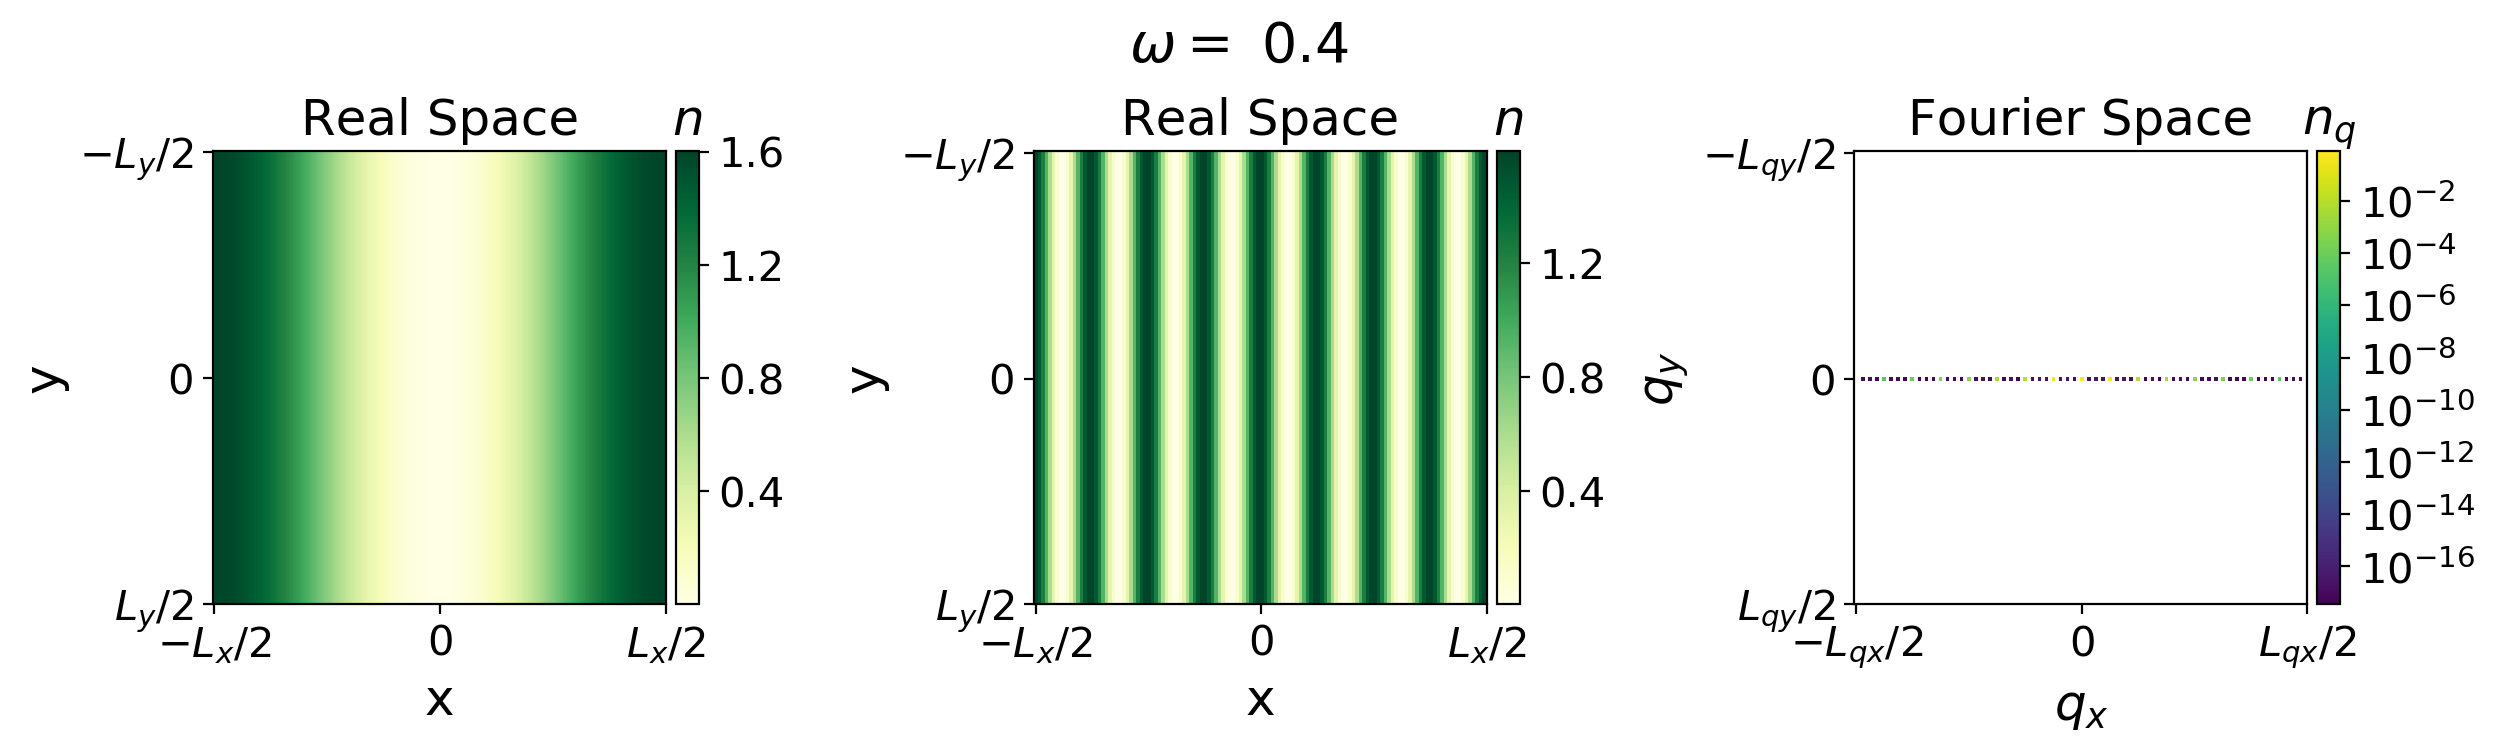

In [17]:
##Final Condition
n = 256; dx = 0.02610653701775; 
m = 256; dy = 0.0301452323496;
file = 'Rolls/Unit_cell/'
w = 0.4

##Real
U = fieldimport(str(file) + 'cf.dat',n,m);

##Phase Space
Uq = fft2(U); Uq = fftshift(Uq);
xs = np.linspace(-n/2,n/2,n); ys = np.linspace(-m/2,m/2,m); 
qx=fftshift(fftfreq(xs.shape[-1],dx))*2*np.pi;
qy=fftshift(fftfreq(ys.shape[-1],dy))*2*np.pi;

##Fig
plt.figure(4,figsize=(15,3),dpi=200)
plt.suptitle('$\omega = $ ' + str(w),y=1.1, fontsize = 20)
plt.subplot(1,3,1);
plt.title('Real Space',fontsize=18); plt.xlabel('x',fontsize=18); plt.ylabel('y',fontsize=18);
ax = plt.gca(); im = ax.imshow(U,'YlGn');
plt.xticks([0,n/2,n],['$-L_x/2$','0','$L_x/2$'],fontsize=15)
plt.yticks([0,m/2,m],['$-L_y/2$','0','$L_y/2$'],fontsize=15)
divider = make_axes_locatable(ax);
cax = divider.append_axes("right", size="5%", pad=0.05);
cbr = plt.colorbar(im, cax=cax); cbr.ax.set_title('$n$',fontsize=18);
tick_locator = matplotlib.ticker.MaxNLocator(nbins=5); cbr.locator = tick_locator; cbr.update_ticks()
cbr.ax.set_yticklabels(cbr.ax.get_yticklabels(), fontsize=15);

n = m = 128
file = 'Rolls/04-2/';
dx=0.417704592284
dy=0.241161858797

##Real
U = fieldimport(str(file) + 'cf0.dat',n,m);

##Phase Space
Uq = fft2(U); Uq = fftshift(Uq);
xs = np.linspace(-n/2,n/2,n); ys = np.linspace(-m/2,m/2,m); 
qx=fftshift(fftfreq(xs.shape[-1],dx))*2*np.pi;
qy=fftshift(fftfreq(ys.shape[-1],dy))*2*np.pi;

plt.subplot(1,3,2);
#plt.title('Real Space',fontsize=18); plt.xlabel('x',fontsize=18); plt.ylabel('y',fontsize=18);
ax = plt.gca(); im = ax.imshow(U,'YlGn');
#plt.xticks([0,n/2,n],['$-L_x/2$','0','$L_x/2$'],fontsize=15)
plt.xticks([])
#plt.yticks([0,m/2,m],['$-L_y/2$','0','$L_y/2$'],fontsize=15)
plt.yticks([])
#divider = make_axes_locatable(ax);
#cax = divider.append_axes("right", size="5%", pad=0.05);
#cbr = plt.colorbar(im, cax=cax); cbr.ax.set_title('$n$',fontsize=18);
#tick_locator = matplotlib.ticker.MaxNLocator(nbins=5); cbr.locator = tick_locator; cbr.update_ticks()
#cbr.ax.set_yticklabels(cbr.ax.get_yticklabels(), fontsize=15);
plt.subplot(1,3,3);
plt.title('Fourier Space',fontsize=18); plt.xlabel('$q_x$',fontsize=18); plt.ylabel('$q_y$',fontsize=18);
ax = plt.gca(); im = ax.imshow(abs(Uq)/(m*n),norm=LogNorm());
plt.xticks([0,len(qx),len(qx)/2],['$-L_{qx}/2$','$L_{qx}/2$','$0$'],fontsize=15)
plt.yticks([0,len(qy),len(qy)/2],['$-L_{qy}/2$','$L_{qy}/2$','$0$'],fontsize=15)
divider = make_axes_locatable(ax);
cax = divider.append_axes("right", size="5%", pad=0.05);
cbr = plt.colorbar(im, cax=cax); cbr.ax.set_title('$n_q$',fontsize=18);
cbr.ax.set_yticklabels(cbr.ax.get_yticklabels(), fontsize=15);

### Positive Hexagons

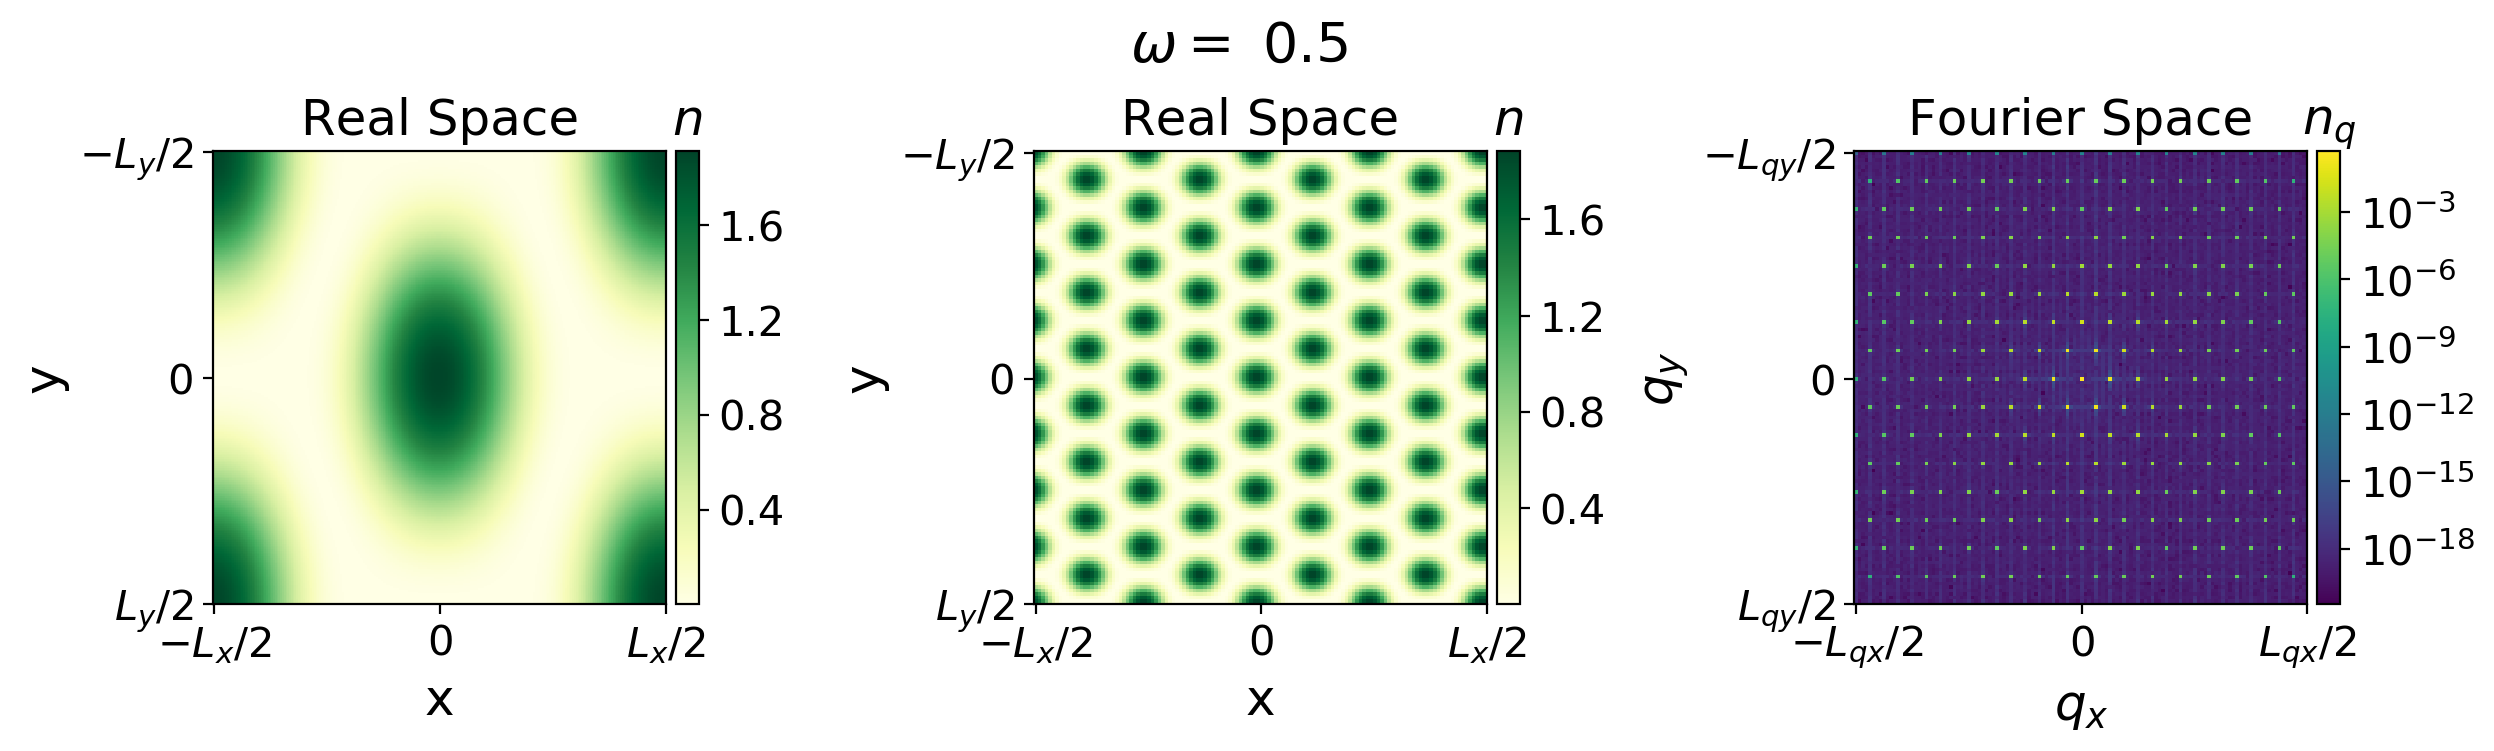

In [18]:
##Final Condition
n = 256; dx = 0.0522130740355; 
m = 256; dy = 0.0301452323496;
file = 'Positive_Hex/Unit_cell/'
w = 0.5

##Real
U = fieldimport(str(file) + '/cf.dat',n,m);

##Phase Space
Uq = fft2(U); Uq = fftshift(Uq);
xs = np.linspace(-n/2,n/2,n); ys = np.linspace(-m/2,m/2,m); 
qx=fftshift(fftfreq(xs.shape[-1],dx))*2*np.pi;
qy=fftshift(fftfreq(ys.shape[-1],dy))*2*np.pi;

##Fig
plt.figure(4,figsize=(15,3),dpi=200)
plt.suptitle('$\omega = $ ' + str(w),y=1.1, fontsize = 20)
plt.subplot(1,3,1);
plt.title('Real Space',fontsize=18); plt.xlabel('x',fontsize=18); plt.ylabel('y',fontsize=18);
ax = plt.gca(); im = ax.imshow(U,'YlGn');
plt.xticks([0,n/2,n],['$-L_x/2$','0','$L_x/2$'],fontsize=15)
plt.yticks([0,m/2,m],['$-L_y/2$','0','$L_y/2$'],fontsize=15)
divider = make_axes_locatable(ax);
cax = divider.append_axes("right", size="5%", pad=0.05);
cbr = plt.colorbar(im, cax=cax); cbr.ax.set_title('$n$',fontsize=18);
tick_locator = matplotlib.ticker.MaxNLocator(nbins=5); cbr.locator = tick_locator; cbr.update_ticks()
cbr.ax.set_yticklabels(cbr.ax.get_yticklabels(), fontsize=15);

file = 'Positive_Hex/Unit_cell';
dx=0.417704592284
dy=0.241161858797
n = m = 128;

##Real
U = fieldimport(str(file) + '/cf128.dat',n,m);

##Phase Space
Uq = fft2(U); Uq = fftshift(Uq);
xs = np.linspace(-n/2,n/2,n); ys = np.linspace(-m/2,m/2,m); 
qx=fftshift(fftfreq(xs.shape[-1],dx))*2*np.pi;
qy=fftshift(fftfreq(ys.shape[-1],dy))*2*np.pi;

plt.subplot(1,3,2);
plt.title('Real Space',fontsize=18); plt.xlabel('x',fontsize=18); plt.ylabel('y',fontsize=18);
ax = plt.gca(); im = ax.imshow(U,'YlGn');
plt.xticks([0,n/2,n],['$-L_x/2$','0','$L_x/2$'],fontsize=15)
plt.yticks([0,m/2,m],['$-L_y/2$','0','$L_y/2$'],fontsize=15)
divider = make_axes_locatable(ax);
cax = divider.append_axes("right", size="5%", pad=0.05);
cbr = plt.colorbar(im, cax=cax); cbr.ax.set_title('$n$',fontsize=18);
tick_locator = matplotlib.ticker.MaxNLocator(nbins=5); cbr.locator = tick_locator; cbr.update_ticks()
cbr.ax.set_yticklabels(cbr.ax.get_yticklabels(), fontsize=15);
plt.subplot(1,3,3);
plt.title('Fourier Space',fontsize=18); plt.xlabel('$q_x$',fontsize=18); plt.ylabel('$q_y$',fontsize=18);
ax = plt.gca(); im = ax.imshow(abs(Uq)/(m*n),norm=LogNorm());
plt.xticks([0,len(qx),len(qx)/2],['$-L_{qx}/2$','$L_{qx}/2$','$0$'],fontsize=15)
plt.yticks([0,len(qy),len(qy)/2],['$-L_{qy}/2$','$L_{qy}/2$','$0$'],fontsize=15)
divider = make_axes_locatable(ax);
cax = divider.append_axes("right", size="5%", pad=0.05);
cbr = plt.colorbar(im, cax=cax); cbr.ax.set_title('$n_q$',fontsize=18);
cbr.ax.set_yticklabels(cbr.ax.get_yticklabels(), fontsize=15);

### Numeric Pattern

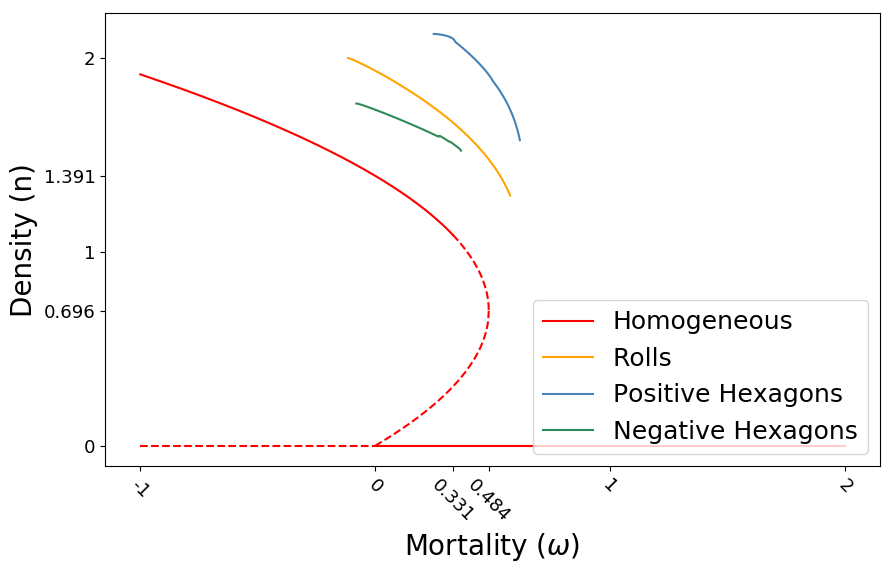

In [19]:
##We are interested in the range w = [-1,2] for the first set of Params.
##Figure of the perturbation linear analysis.

###ANALYTIC
plt.figure(1,figsize=(10,6),dpi=100)
w1 = np.linspace(-1,0,100); w2 = np.linspace(0,2,100);
plt.plot(w1,np.zeros(len(w1)),'--r'); plt.plot(w2,np.zeros(len(w1)),'r',label='Homogeneous');

w3 = np.linspace(0,a**2/(4*b),200);
Ubminus = (a - np.sqrt(a**2-4*w3*b)) / (2*b);
plt.plot(w3,Ubminus,'--r');

w4 = np.linspace(-1,Wc,200); w5 = np.linspace(Wc,a**2/(4*b),200);
Ubplus1 = (a + np.sqrt(a**2-4*w4*b)) / (2*b); Ubplus2 = (a + np.sqrt(a**2-4*w5*b)) / (2*b);
plt.plot(w4,Ubplus1,'r'); plt.plot(w5,Ubplus2,'--r');

#plt.axvline(x=0.0,color='k',linestyle='--',linewidth=1)
#plt.axvline(x=Wc,color='k',linestyle='--',linewidth=1)
#plt.axvline(x=a**2/(4*b),color='k',linestyle='--',linewidth=1)
#plt.axhline(y=a/(2*b),color='k',linestyle='--',linewidth=1)
#plt.axhline(y=a/b,color='k',linestyle='--',linewidth=1)

plt.yticks([0,a/(2*b),a/b,1,2],('0',round(a/2*b,3),round(a/b,3),'1','2'),fontsize=13)
plt.xticks([-1,0, Wc, a**2/(4*b),1,2], ('-1','0', round(Wc,3), round(a**2/(4*b),3),'1','2'),rotation=-45,fontsize=13)

###################-----------------------##################

############ PATTERNS###########
n = m = 128;

file = 'Rolls/04+2';
wvec = np.loadtxt(file + '/wvec.dat', unpack = True); Uvec = np.zeros(len(wvec));
for ii in xrange(len(wvec)): 
    U = fieldimport(str(file) + '/cf' + str(ii+1) + '.dat',m,n)
    Uvec[ii] = np.max(U)
plt.plot(wvec[:-5],Uvec[:-5],'orange', label = 'Rolls')

file = 'Rolls/04-2';
wvec = np.loadtxt(file + '/wvec.dat', unpack = True); Uvec = np.zeros(len(wvec));
for ii in xrange(len(wvec)): 
    U = fieldimport(str(file) + '/cf' + str(ii+1) + '.dat',m,n)
    Uvec[ii] = np.max(U)
plt.plot(wvec[1:-17],Uvec[1:-17],'orange')

################################

n = m = 64;

file = 'Positive_Hex/Tot64';
wvec = np.loadtxt(file + '/wvec.dat', unpack = True); wvec = wvec[:-1]; Uvec = np.zeros(len(wvec));
for ii in xrange(len(wvec)): 
    U = fieldimport(str(file) + '/cf' + str(ii+1) + '.dat',m,n)
    Uvec[ii] = np.max(U)
plt.plot(wvec,Uvec,'steelblue',label='Positive Hexagons')

file = 'Negative_Hex/Tot64';
wvec = np.loadtxt(file + '/wvec.dat', unpack = True); wvec = wvec[:-1]; Uvec = np.zeros(len(wvec));
for ii in xrange(len(wvec)): 
    U = fieldimport(str(file) + '/cf' + str(ii+1) + '.dat',m,n)
    Uvec[ii] = np.max(U)
plt.plot(wvec,Uvec,'seagreen',label='Negative Hexagons')

plt.xlabel('Mortality ($\omega$)',fontsize=20); plt.ylabel('Density (n)',fontsize=20);
plt.legend(loc = 'lower right', fontsize=18)

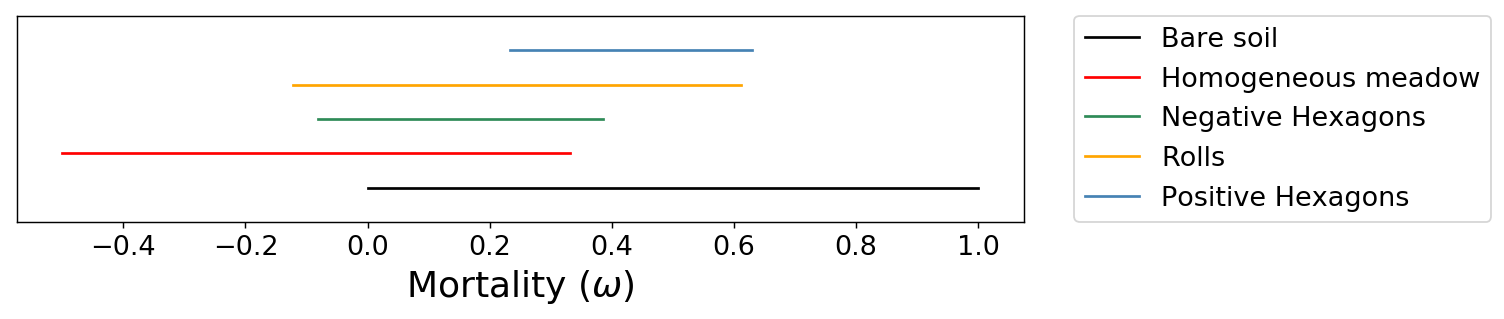

In [82]:
plt.figure(1,figsize=(10,2.1),dpi = 130)
plt.plot(np.linspace(0,1,10),np.ones(10)*0,'k',label='Bare soil')
plt.plot(np.linspace(-0.5,Wc,10),np.ones(10)*1,'r',label='Homogeneous meadow')
plt.plot(np.linspace(-0.081,0.386,10),np.ones(10)*2,'seagreen',label='Negative Hexagons')
plt.plot(np.linspace(-0.122,0.612,10),np.ones(10)*3,'orange',label='Rolls')
plt.plot(np.linspace(0.234,0.629,10),np.ones(10)*4,'steelblue',label='Positive Hexagons')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,fontsize=15)
plt.ylim(-1,5); plt.yticks([]); plt.xticks(fontsize=15);
plt.xlabel('Mortality ($\omega$)',fontsize=20);